In [ ]:
import pandas as pd
import numpy as np

In [26]:
import numpy as np
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd

In [19]:
df = pd.read_csv("C:/Users/DELL/Desktop/cars3/combined_unpack_df.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_7976\337357014.py:1: DtypeWarning: Columns (29,31,85,88,89,90,91,92,93,94,97,100,101,102,104,105,106,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/DELL/Desktop/cars3/combined_unpack_df.csv")


In [20]:
df.isnull().sum()

it                      0
ft                      0
bt                      4
km                      0
transmission            0
                     ... 
Cargo Volumn         1593
Compression Ratio    6474
Acceleration         3512
Top Speed            3762
city                    0
Length: 179, dtype: int64

#null values removal

In [21]:
threshold = len(df) * 0.5
df.dropna(axis=1, thresh=threshold,inplace=True)

print(df.nunique())
# Discard columns that contain only a single unique value.
df = df.loc[:, df.nunique() > 1]

# Checking for duplicate rows and drop those rows 
print(df.duplicated().sum())
df.drop_duplicates(keep='first',inplace=True)   
print(df.duplicated().sum())

it                    1
ft                    5
bt                   10
km                 4090
transmission          2
                   ... 
No Door Numbers       5
Cargo Volumn        321
Acceleration        332
Top Speed           305
city                  6
Length: 81, dtype: int64
85
0


In [ ]:
#cleaning the data

In [22]:
df.drop(['owner','centralVariantId','Fuel Type','Registration Year','Year of Manufacture','Engine Displacement','Transmission','Max Power','Torque','Wheel Size','Seats.1','Engine','Torque','Length','Width','Height','Wheel Base','Front Tread','Rear Tread','Kerb Weight','Values per Cylinder','Value Configuration','Seats',
         'Turning Radius','Top Speed','Acceleration','Alloy Wheel Size','Kms Driven','Ownership','Max Torque','Cargo Volumn'],axis=1,inplace=True)

print(df.columns.tolist())
df.head(1)

['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear', 'variantName', 'price', 'Insurance Validity', 'RTO', 'Mileage', 'Color', 'Engine Type', 'Displacement', 'No of Cylinder', 'Fuel Suppy System', 'Turbo Charger', 'Super Charger', 'Gear Box', 'Drive Type', 'Seating Capacity', 'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Tyre Type', 'No Door Numbers', 'city']


,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,...,Super Charger,Gear Box,Drive Type,Seating Capacity,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,city
0,Petrol,Sedan,"70,000",Automatic,3,Toyota,Toyota Camry,2014,Hybrid,₹ 9.75 Lakh,...,No,6 Speed,FWD,5.0,Power,Ventilated Disc,Solid Disc,"Tubeless,Radial",4.0,Kolkata


In [23]:
import re

# Function to convert price from string to numerical
def convert_price(price_str):
    # Check if the input is a string
    if isinstance(price_str, str):
        # Remove the currency symbol and commas
        price_str = re.sub(r'[₹,]', '', price_str).strip()
        
        # Handle different units
        if 'Crore' in price_str:
            price_str = price_str.replace('Crore', '').strip()
            return float(price_str) * 10000000  # Convert to the base unit (e.g., rupees)
        elif 'Lakh' in price_str:
            price_str = price_str.replace('Lakh', '').strip()
            return float(price_str) * 100000  # Convert to the base unit (e.g., rupees)
        elif 'Thousand' in price_str:
            price_str = price_str.replace('Thousand', '').strip()
            return float(price_str) * 1000  # Convert to the base unit (e.g., rupees)
        else:
            return float(price_str)  # Assume it's already in the base unit (e.g., rupees)
    # Return NaN if the input is not a string (e.g., if it's already a number or NaN)
    return price_str

# Apply the conversion function to the 'price' column
df['price'] = df['price'].apply(convert_price)


In [24]:
print(df['km'].isna().sum())

def convert_km(km_str):
    # Remove commas
    km_str = re.sub(r',', '', km_str).strip()
    # Convert to float
    return float(km_str)

# Apply the conversion function to the 'km' column
df['km'] = df['km'].apply(convert_km)
df.head(1)

0


,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,...,Super Charger,Gear Box,Drive Type,Seating Capacity,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,city
0,Petrol,Sedan,70000.0,Automatic,3,Toyota,Toyota Camry,2014,Hybrid,975000.0,...,No,6 Speed,FWD,5.0,Power,Ventilated Disc,Solid Disc,"Tubeless,Radial",4.0,Kolkata


In [27]:
def cl_mileage(value):
    if pd.isna(value):
        return np.nan

    value = str(value).strip().lower()

    if 'km/kg' in value:
        numeric_value = re.sub(r'[^\d.]', '', value)
        numeric_value = numeric_value.rstrip('.')
        value_float = float(numeric_value)*0.74
        return value_float

    else:
        numeric_value = re.sub(r'[^\d.]', '', value)
        numeric_value = numeric_value.rstrip('.')
        value_float = float(numeric_value)
        return value_float

df['Mileage'] = df['Mileage'].apply(cl_mileage)
df.head(1)



,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,...,Super Charger,Gear Box,Drive Type,Seating Capacity,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,city
0,Petrol,Sedan,70000.0,Automatic,3,Toyota,Toyota Camry,2014,Hybrid,975000.0,...,No,6 Speed,FWD,5.0,Power,Ventilated Disc,Solid Disc,"Tubeless,Radial",4.0,Kolkata


In [28]:
# filling null values in numerical columns with mean, median or mode 
df['Mileage'].fillna(df['Mileage'].mean().round(2), inplace=True)
df['Displacement'].fillna(df['Displacement'].median(), inplace=True)
df['No of Cylinder'].fillna(df['No of Cylinder'].median(), inplace=True)
df['Seating Capacity'].fillna(df['Seating Capacity'].mode()[0], inplace=True)
df['No Door Numbers'].fillna(df['Seating Capacity'].mode()[0], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7976\744595438.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mileage'].fillna(df['Mileage'].mean().round(2), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7976\744595438.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [52]:
df.isna().sum()

ft                     0
bt                     0
km                     0
transmission           0
ownerNo                0
oem                    0
model                  0
modelYear              0
variantName            0
price                  0
InsuranceValidity      4
RTO                  874
Mileage                0
Color                  3
EngineType             0
Displacement           0
NoofCylinder           0
FuelSuppySystem        0
TurboCharger           0
SuperCharger           0
GearBox              106
DriveType              0
 SeatingCapacity       0
SteeringType           0
FrontBrakeType        96
RearBrakeType         96
TyreType              77
NoDoorNumbers          0
city                   0
dtype: int64

In [49]:
df['Mileage'].fillna(df['Mileage'].mean().round(2), inplace=True)
df['Displacement'].fillna(df['Displacement'].median(), inplace=True)
df['NoofCylinder'].fillna(df['NoofCylinder'].median(), inplace=True)
df['NoDoorNumbers'].fillna(df['NoDoorNumbers'].mode()[0], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7976\2176912258.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mileage'].fillna(df['Mileage'].mean().round(2), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7976\2176912258.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [51]:
# Fill null values in 'EngineType' with the previous (forward fill) values
df['bt'] = df['bt'].fillna(method='ffill')

# Change the column type to string
df['bt'] = df['bt'].astype(str)


C:\Users\DELL\AppData\Local\Temp\ipykernel_7976\3833313027.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['bt'] = df['bt'].fillna(method='ffill')


In [42]:
# Fill null values in 'EngineType' with the previous (forward fill) values
df['SteeringType'] = df['SteeringType'].fillna(method='ffill')

# Change the column type to string
df['SteeringType'] = df['SteeringType'].astype(str)


C:\Users\DELL\AppData\Local\Temp\ipykernel_7976\2655316691.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['SteeringType'] = df['SteeringType'].fillna(method='ffill')


In [36]:
# Fill null values in 'EngineType' with the previous (forward fill) values
df['DriveType'] = df['DriveType'].fillna(method='ffill')

# Change the column type to string
df['DriveType'] = df['DriveType'].astype(str)


C:\Users\DELL\AppData\Local\Temp\ipykernel_7976\3620828899.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['DriveType'] = df['DriveType'].fillna(method='ffill')


In [38]:
# Fill null values in 'EngineType' with the previous (forward fill) values
df['TurboCharger'] = df['TurboCharger'].fillna(method='ffill')

# Change the column type to string
df['TurboCharger'] = df['TurboCharger'].astype(str)


C:\Users\DELL\AppData\Local\Temp\ipykernel_7976\1611483759.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['TurboCharger'] = df['TurboCharger'].fillna(method='ffill')


In [40]:
# Fill null values in 'EngineType' with the previous (forward fill) values
df['SuperCharger'] = df['SuperCharger'].fillna(method='ffill')

# Change the column type to string
df['SuperCharger'] = df['SuperCharger'].astype(str)


C:\Users\DELL\AppData\Local\Temp\ipykernel_7976\186326398.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['SuperCharger'] = df['SuperCharger'].fillna(method='ffill')


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ft            2 non-null      object 
 1   bt            2 non-null      object 
 2   km            2 non-null      float64
 3   transmission  2 non-null      object 
 4   ownerNo       2 non-null      int64  
 5   oem           2 non-null      object 
 6   model         2 non-null      object 
 7   modelYear     2 non-null      int64  
 8   variantName   2 non-null      object 
 9   price         2 non-null      float64
 10  Mileage       2 non-null      float64
dtypes: float64(3), int64(2), object(6)
memory usage: 304.0+ bytes


In [80]:
# Group by 'oem' and 'model' and calculate the mean for 'Mileage' and 'price'
grouped_df = df.groupby(['oem', 'model']).agg({
    'Mileage': 'mean',
    'price': 'mean'
}).reset_index()

print(grouped_df)


    oem   model  Mileage     price
0  OEM1  Model1     15.0  500000.0
1  OEM2  Model2     20.0  750000.0


In [81]:
# Group by 'transmission' and 'modelYear' and count occurrences
transmission_model_year_counts = df.groupby(['transmission', 'modelYear']).size().reset_index(name='count')
print(transmission_model_year_counts)


  transmission  modelYear  count
0    Automatic       2021      1
1       Manual       2020      1


In [82]:
# Group by 'oem' and 'ownerNo' to calculate median 'km'
median_km = df.groupby(['oem', 'ownerNo'])['km'].median().reset_index()
print(median_km)


    oem  ownerNo      km
0  OEM1        1  100.50
1  OEM2        2  200.75


In [83]:
# Group by 'variantName' and get the maximum price
max_price_per_variant = df.groupby('variantName')['price'].max().reset_index()
print(max_price_per_variant)


  variantName     price
0    Variant1  500000.0
1    Variant2  750000.0


In [78]:
# Strip any leading/trailing whitespace from all column names
df.columns = df.columns.str.strip()

# Rename the columns as desired
df.rename(columns={
    'Insurance Validity': 'InsuranceValidity',
    'Engine Type': 'EngineType',
    'No of Cylinder': 'NoofCylinder',
    'Fuel Suppy System': 'FuelSuppySystem',
    'No Door Numbers': 'NoDoorNumbers',
    'Turbo Charger': 'TurboCharger',
    'Super Charger': 'SuperCharger',
    'Drive Type': 'DriveType',
    'Gear Box': 'GearBox',
    'Rear Brake Type': 'RearBrakeType',
    'Seating Capacity':' SeatingCapacity',
    'Steering Type' :'SteeringType',
    'Tyre Type' :'TyreType',
    'Front Brake Type':'FrontBrakeType'
   
    
    
}, inplace=True)


In [34]:
# Fill null values in 'EngineType' with the previous (forward fill) values
df['EngineType'] = df['EngineType'].fillna(method='ffill')

# Change the column type to string
df['EngineType'] = df['EngineType'].astype(str)


C:\Users\DELL\AppData\Local\Temp\ipykernel_7976\2885674481.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['EngineType'] = df['EngineType'].fillna(method='ffill')


In [44]:
# Fill null values in 'EngineType' with the previous (forward fill) values
df['FuelSuppySystem'] = df['FuelSuppySystem'].fillna(method='ffill')

# Change the column type to string
df['FuelSuppySystem'] = df['FuelSuppySystem'].astype(str)


C:\Users\DELL\AppData\Local\Temp\ipykernel_7976\400323244.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['FuelSuppySystem'] = df['FuelSuppySystem'].fillna(method='ffill')


In [57]:
df.isna().sum()

ft                     0
bt                     0
km                     0
transmission           0
ownerNo                0
oem                    0
model                  0
modelYear              0
variantName            0
price                  0
InsuranceValidity      4
RTO                  874
Mileage                0
Color                  3
EngineType             0
Displacement           0
NoofCylinder           0
FuelSuppySystem        0
TurboCharger           0
SuperCharger           0
GearBox              106
DriveType              0
 SeatingCapacity       0
SteeringType           0
FrontBrakeType        96
RearBrakeType         96
TyreType               0
NoDoorNumbers          0
city                   0
dtype: int64

In [56]:
# Fill null values in 'TyreType' with the previous (forward fill) values
df['TyreType'] = df['TyreType'].fillna(method='ffill')

# Change the column type to string
df['TyreType'] = df['TyreType'].astype(str)


C:\Users\DELL\AppData\Local\Temp\ipykernel_7976\1078982727.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['TyreType'] = df['TyreType'].fillna(method='ffill')


In [59]:
# Fill null values in 'GearBox' with the previous (forward fill) values
df['GearBox'] = df['GearBox'].fillna(method='ffill')

# Change the column type to string
df['GearBox'] = df['GearBox'].astype(str)


C:\Users\DELL\AppData\Local\Temp\ipykernel_7976\2998968224.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['GearBox'] = df['GearBox'].fillna(method='ffill')


In [62]:
# Remove outliers in the numerical columns using z-score
# Function to remove outliers using Z-score
def remove_outliers(df, columns, z_thresh=3):
        for column in columns:
        # Calculate Z-scores
            z_scores = stats.zscore(df[column])
        
        # Filter out the outliers
            df = df[(abs(z_scores) < z_thresh)]
    
        return df

# Apply the function to the DataFrame
columns_to_check = ['km','price','modelYear','Mileage','Displacement']
df_outliers_removed = remove_outliers(df, columns_to_check)
df_outliers_removed.shape

(7838, 29)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8284 entries, 0 to 8368
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ft                 8284 non-null   object 
 1   bt                 8284 non-null   object 
 2   km                 8284 non-null   float64
 3   transmission       8284 non-null   object 
 4   ownerNo            8284 non-null   int64  
 5   oem                8284 non-null   object 
 6   model              8284 non-null   object 
 7   modelYear          8284 non-null   int64  
 8   variantName        8284 non-null   object 
 9   price              8284 non-null   float64
 10  InsuranceValidity  8280 non-null   object 
 11  RTO                7410 non-null   object 
 12  Mileage            8284 non-null   float64
 13  Color              8281 non-null   object 
 14  EngineType         8284 non-null   object 
 15  Displacement       8284 non-null   float64
 16  NoofCylinder       8284 non-n

In [69]:
import pandas as pd

# Sample data to initialize df
data = {
    'ft': ['A', 'B'],
    'bt': ['X', 'Y'],
    'km': [100.5, 200.75],
    'transmission': ['Manual', 'Automatic'],
    'ownerNo': [1, 2],
    'oem': ['OEM1', 'OEM2'],
    'model': ['Model1', 'Model2'],
    'modelYear': [2020, 2021],
    'variantName': ['Variant1', 'Variant2'],
    'price': [500000.0, 750000.0],
    'Mileage': [15.0, 20.0]
    # Add more columns as needed
}

df = pd.DataFrame(data)

# Now you can apply the mapping code
dtype_mapping = {
    'float64': 'FLOAT',
    'object': 'TEXT',
    'int64': 'INT'
}

# Apply the mapping to the DataFrame's dtypes
sql_dtypes = {col: dtype_mapping[str(dtype)] for col, dtype in df.dtypes.items()}

# Display the resulting dictionary of SQL-like column data types for the table named 'df'
print(f"SQL-like data types for table 'df':\n{sql_dtypes}")


SQL-like data types for table 'df':
{'ft': 'TEXT', 'bt': 'TEXT', 'km': 'FLOAT', 'transmission': 'TEXT', 'ownerNo': 'INT', 'oem': 'TEXT', 'model': 'TEXT', 'modelYear': 'INT', 'variantName': 'TEXT', 'price': 'FLOAT', 'Mileage': 'FLOAT'}


In [88]:
df.head(6)

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,Mileage
0,A,X,100.50,Manual,1,OEM1,Model1,2020,Variant1,500000.0,15.0
1,B,Y,200.75,Automatic,2,OEM2,Model2,2021,Variant2,750000.0,20.0


In [64]:
df=df.to_csv("C:/Users/DELL/Downloads/combined_cl.csv")

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency

In [6]:
import stat

In [7]:
df=pd.read_csv("C:/Users/DELL/Desktop/cars3/combined_cl.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8284 entries, 0 to 8283
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ft                 8284 non-null   object 
 1   bt                 8284 non-null   object 
 2   km                 8284 non-null   int64  
 3   transmission       8284 non-null   object 
 4   ownerNo            8284 non-null   int64  
 5   oem                8284 non-null   object 
 6   model              8284 non-null   object 
 7   modelYear          8284 non-null   int64  
 8   variantName        8284 non-null   object 
 9   price              8284 non-null   int64  
 10  InsuranceValidity  8280 non-null   object 
 11  RTO                7410 non-null   object 
 12  Mileage            8284 non-null   float64
 13  Color              8281 non-null   object 
 14  EngineType         8284 non-null   object 
 15  Displacement       8284 non-null   int64  
 16  NoofCylinder       8284 

In [11]:
df.isna().sum()

ft                   0
bt                   0
km                   0
transmission         0
ownerNo              0
oem                  0
model                0
modelYear            0
variantName          0
price                0
InsuranceValidity    4
RTO                  0
Mileage              0
Color                0
EngineType           0
Displacement         0
NoofCylinder         0
FuelSuppySystem      0
TurboCharger         0
SuperCharger         0
GearBox              0
DriveType            0
 SeatingCapacity     0
SteeringType         0
FrontBrakeType       0
RearBrakeType        0
TyreType             0
NoDoorNumbers        0
city                 0
dtype: int64

In [10]:
# Fill null values in 'FrontBrakeType' and 'RearBrakeType' with forward fill
df[['FrontBrakeType', 'RearBrakeType','RTO','Color']] = df[['FrontBrakeType', 'RearBrakeType','RTO','Color']].fillna(method='ffill')

# Change the column types to string
df[['FrontBrakeType', 'RearBrakeType','RTO','Color']] = df[['FrontBrakeType', 'RearBrakeType','RTO','Color']].astype(str)


In [12]:
# Import the stats module from scipy
from scipy import stats

# Define the function to remove outliers
def remove_outliers(df, columns, z_thresh=3):
    for column in columns:
        # Calculate Z-scores
        z_scores = stats.zscore(df[column])

        # Filter out the outliers
        df = df[(abs(z_scores) < z_thresh)]
    return df

# Apply the function to the DataFrame
columns_to_check = ['km', 'price', 'modelYear', 'Mileage', 'Displacement']
df_outliers_removed = remove_outliers(df, columns_to_check)
df_outliers_removed.shape


(7838, 29)

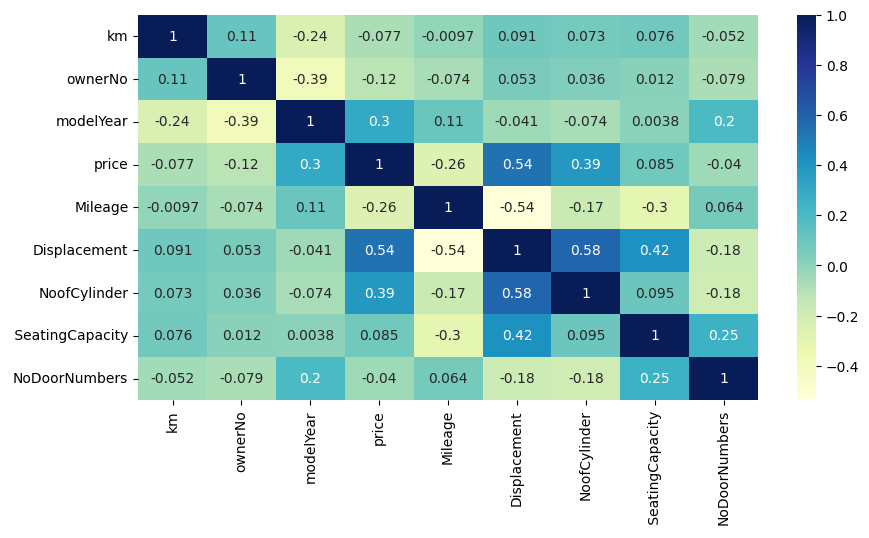

In [13]:
# Select only the numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap for the correlation matrix of numeric columns
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_df.corr(), cmap="YlGnBu", annot=True)
plt.show()


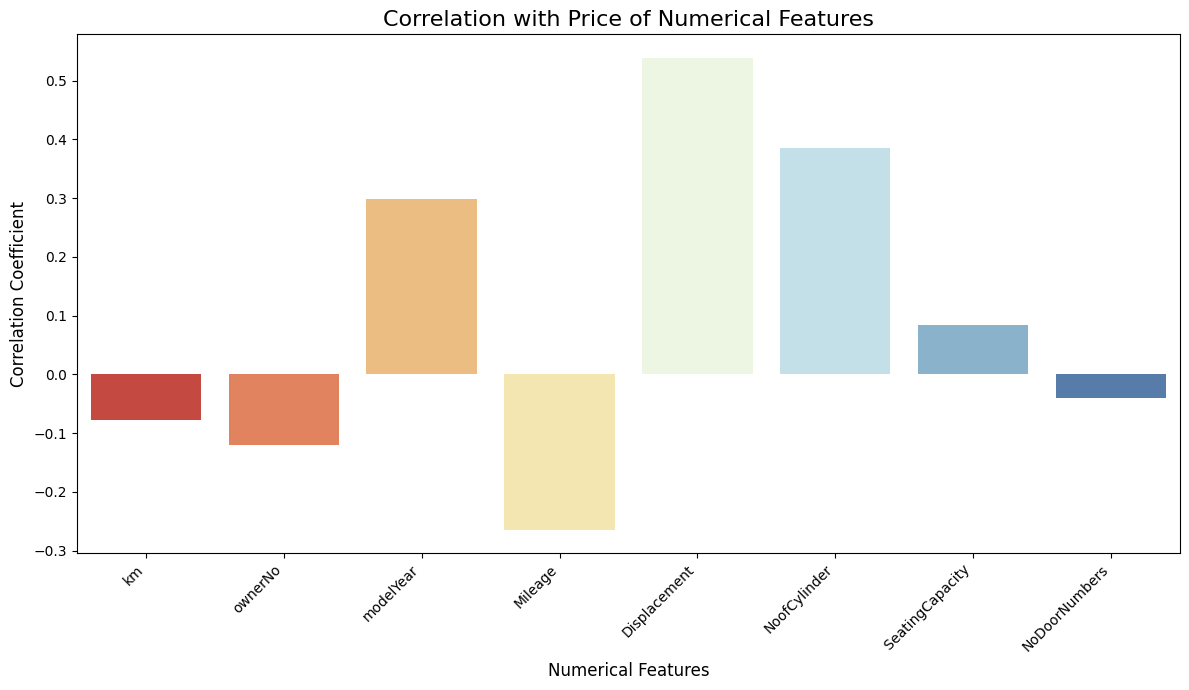

In [14]:
# Calculate correlations of all numerical columns with 'price'
corr_with_price = numeric_df.corr()['price'].drop('price')

# Plot the bar plot for correlation of numerical features with 'price'
plt.figure(figsize=(12, 7))
sns.barplot(x=corr_with_price.index, y=corr_with_price.values, palette='RdYlBu')
plt.title('Correlation with Price of Numerical Features', fontsize=16)
plt.xlabel('Numerical Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


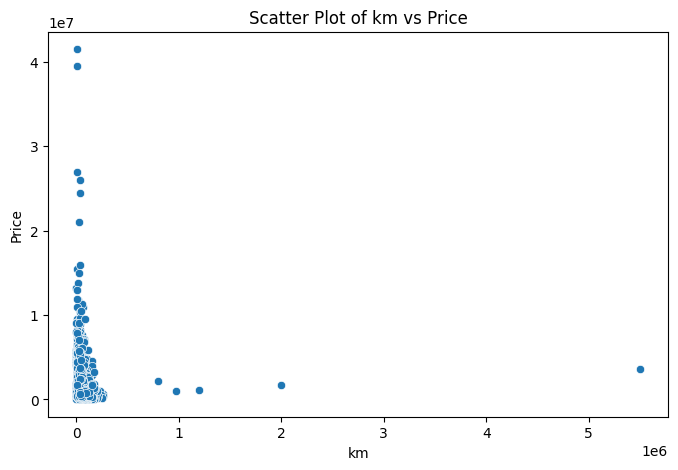

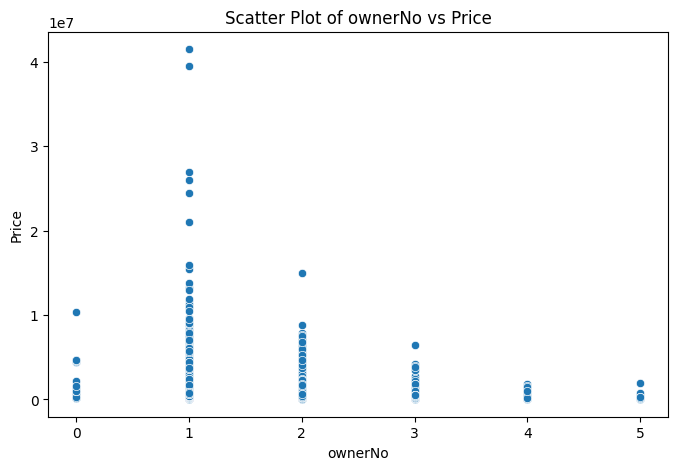

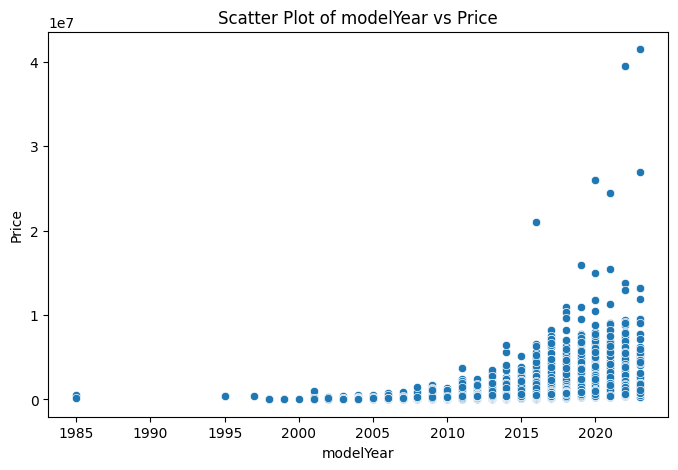

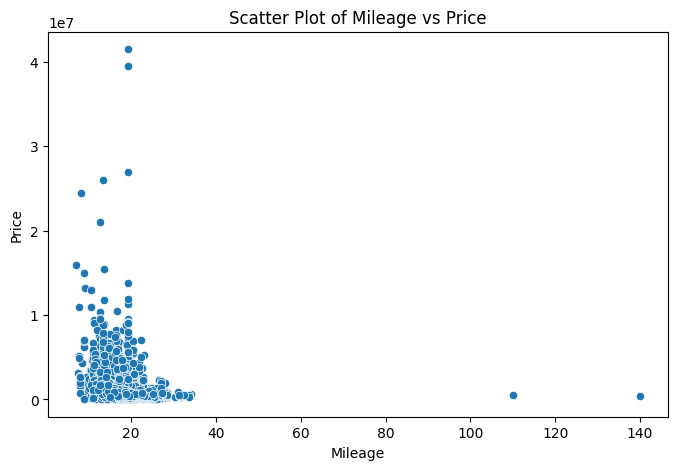

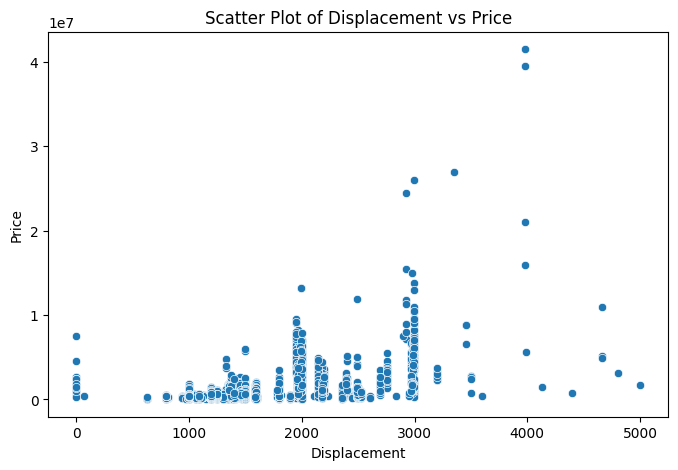

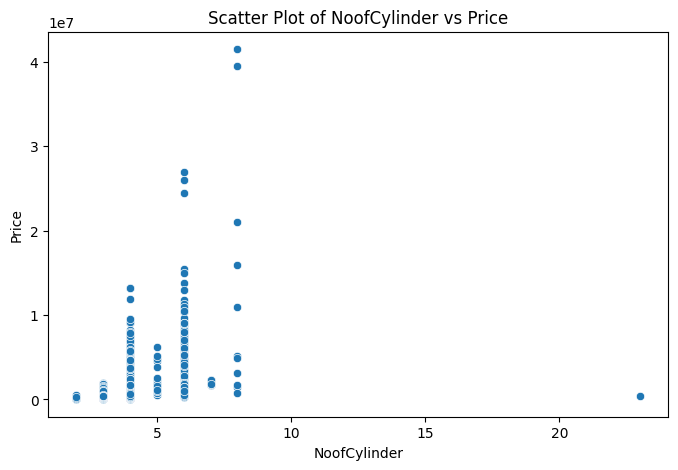

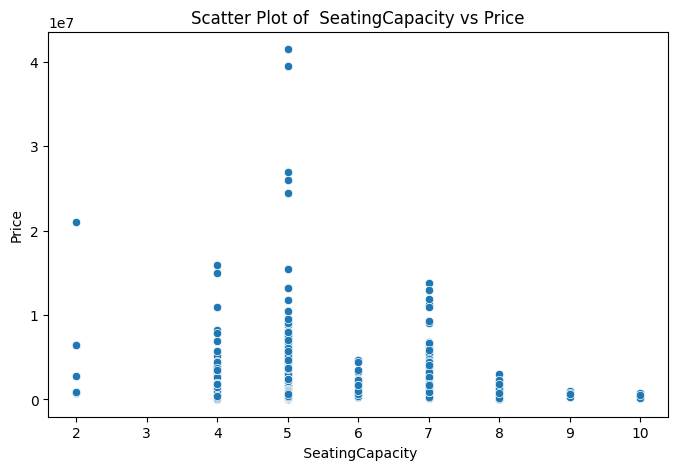

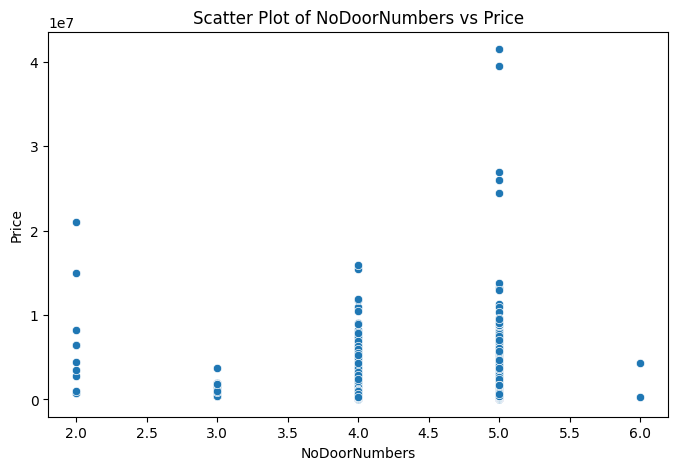

In [15]:
# Scatter plot for each numerical feature against 'price'
for column in numeric_df.columns:
    if column != 'price':
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=df, x=column, y='price')
        plt.title(f'Scatter Plot of {column} vs Price')
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.show()


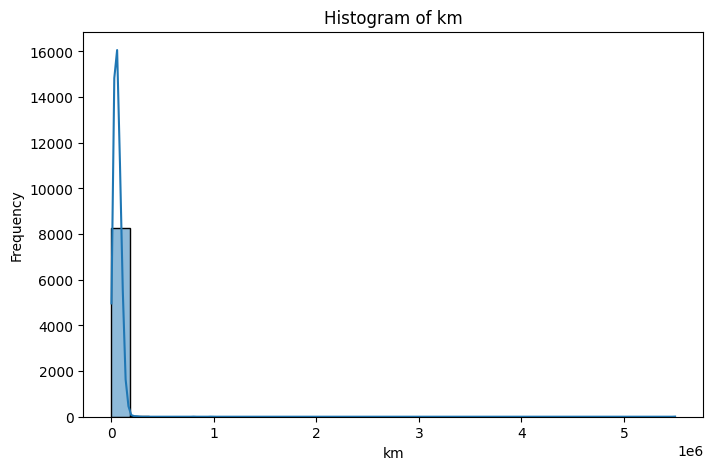

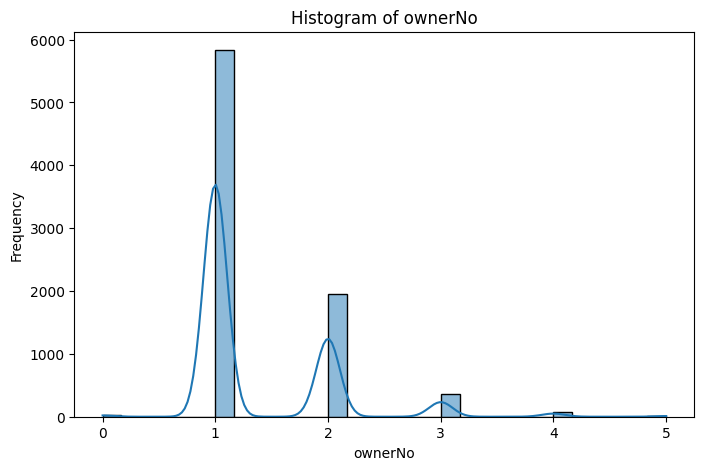

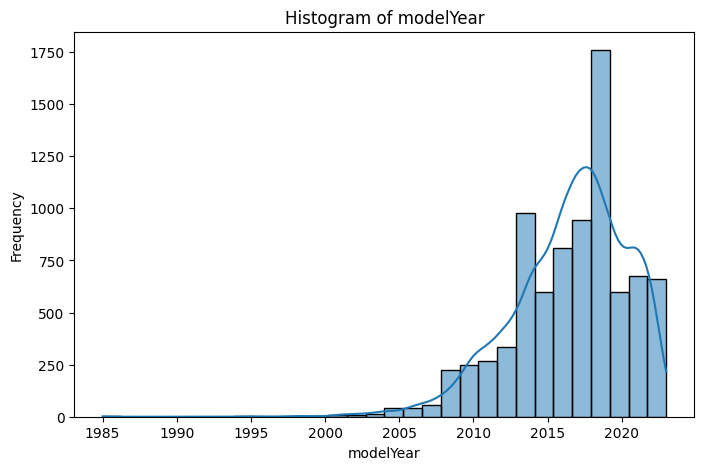

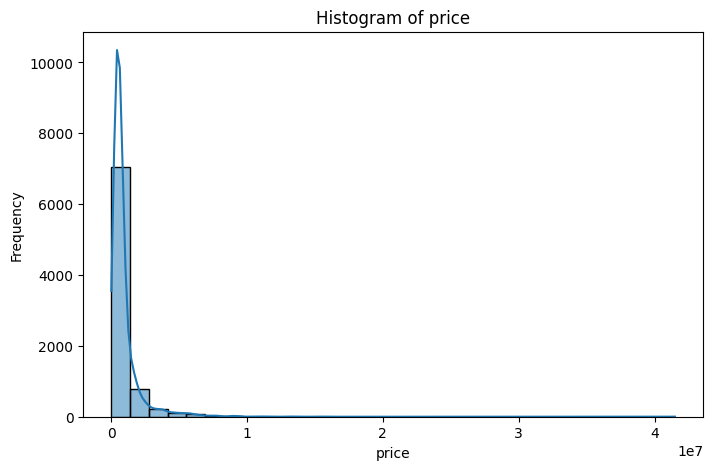

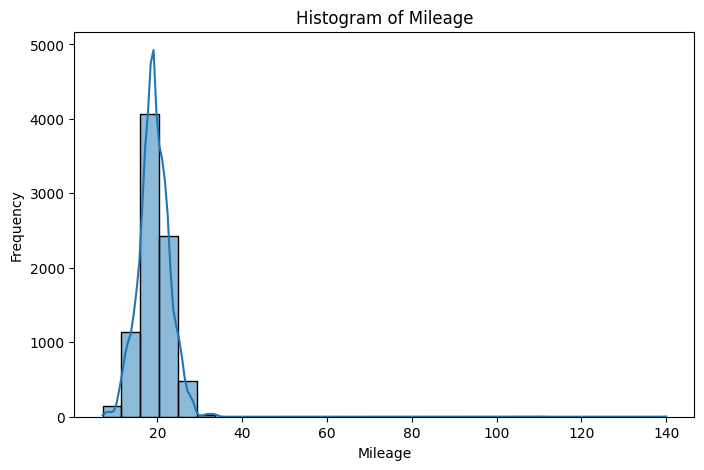

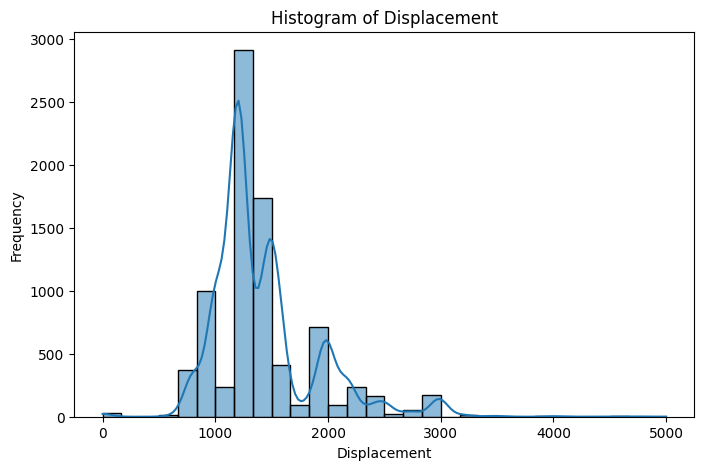

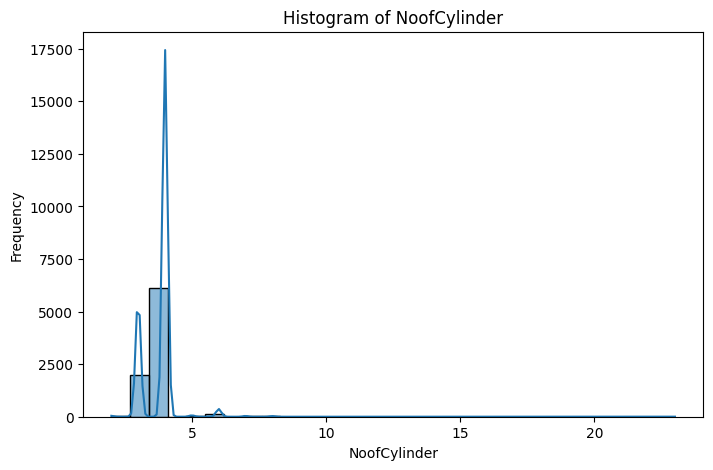

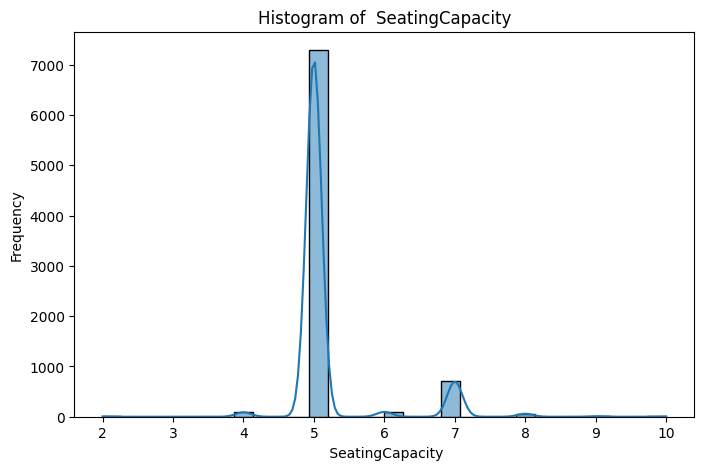

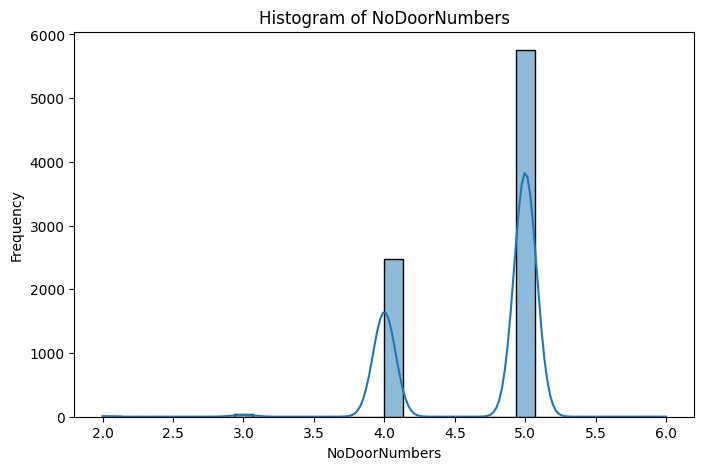

In [16]:
# Histogram for each numerical feature
for column in numeric_df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


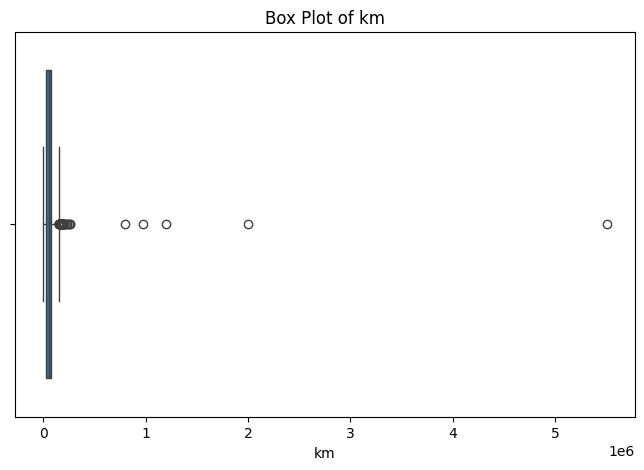

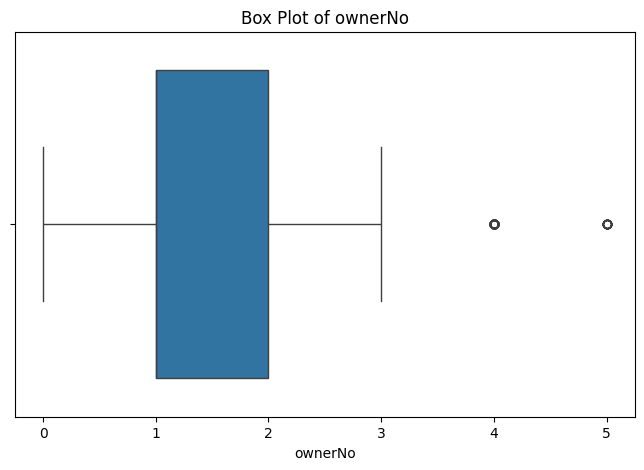

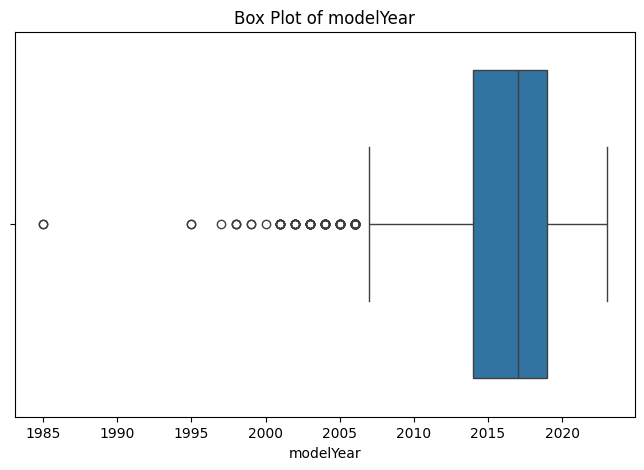

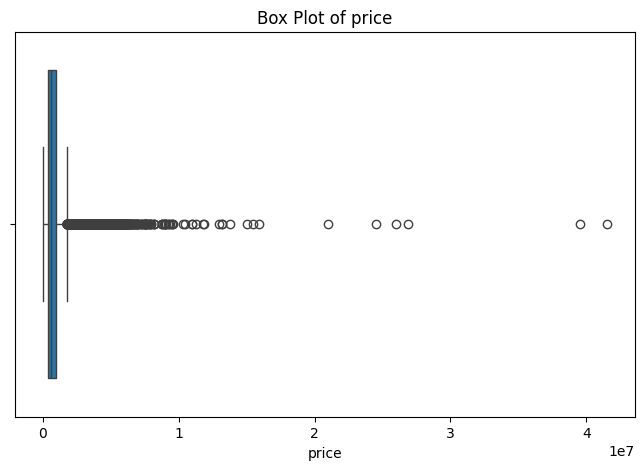

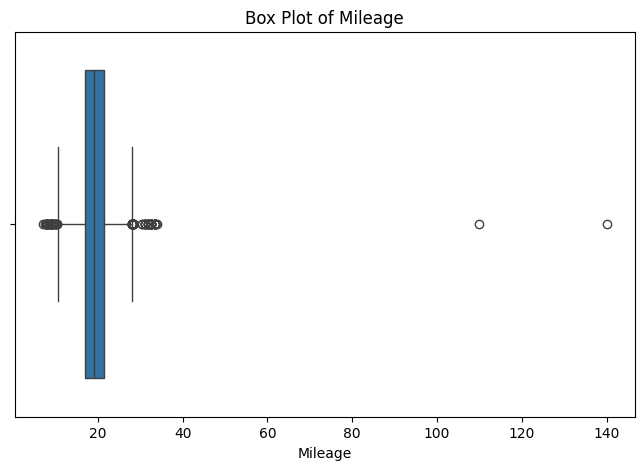

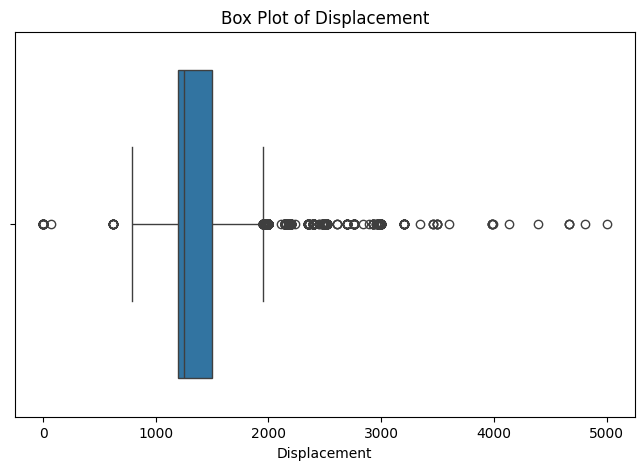

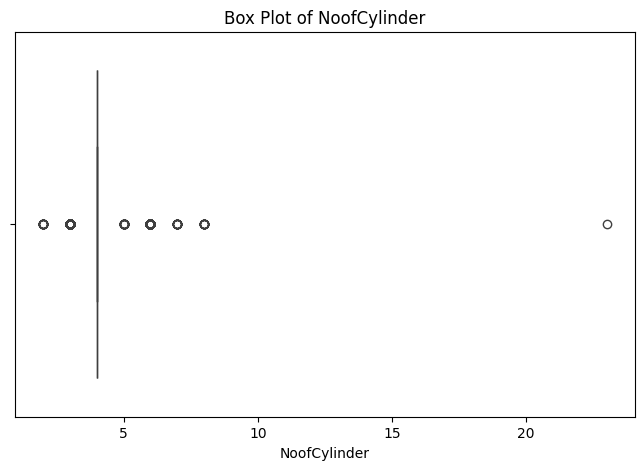

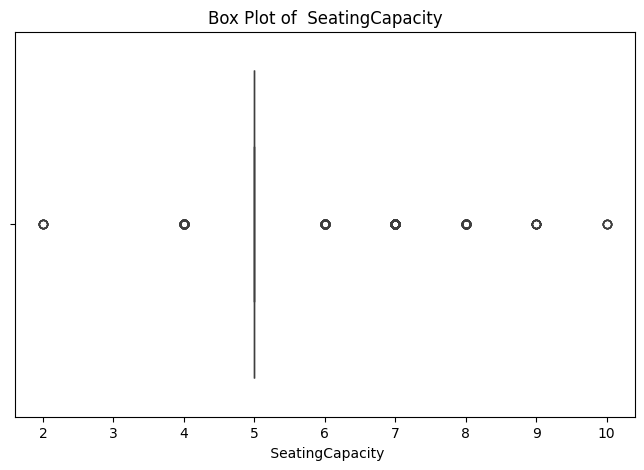

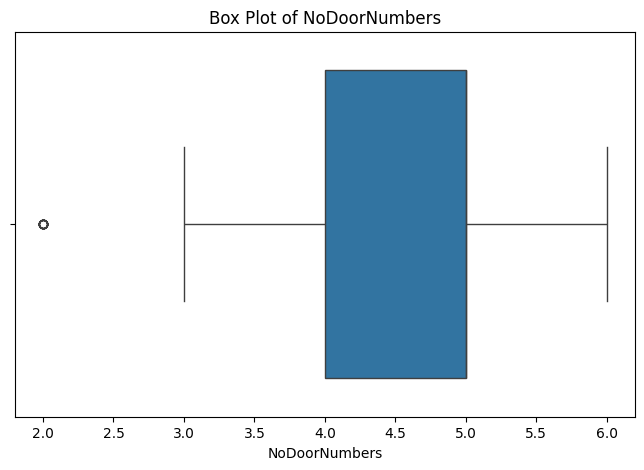

In [17]:
# Box plot for each numerical feature
for column in numeric_df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


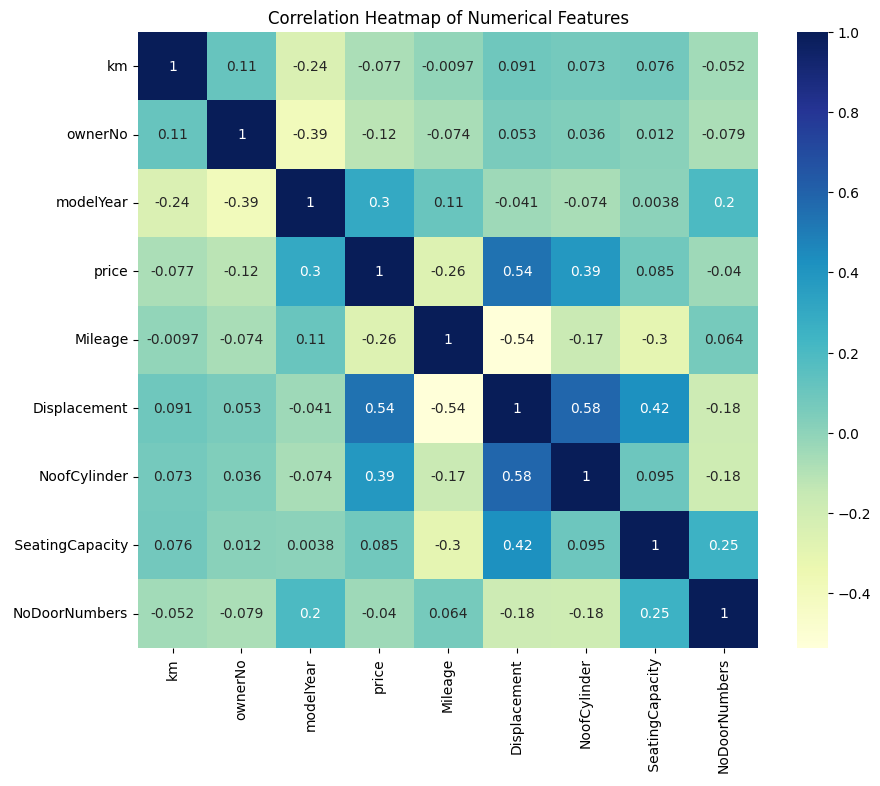

In [18]:
# Correlation heatmap of numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


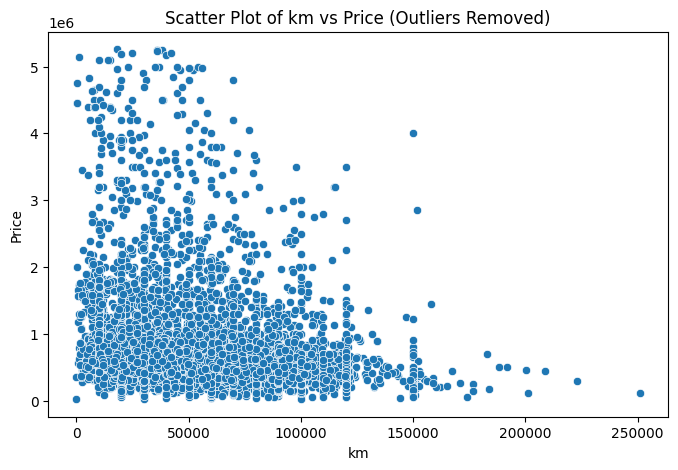

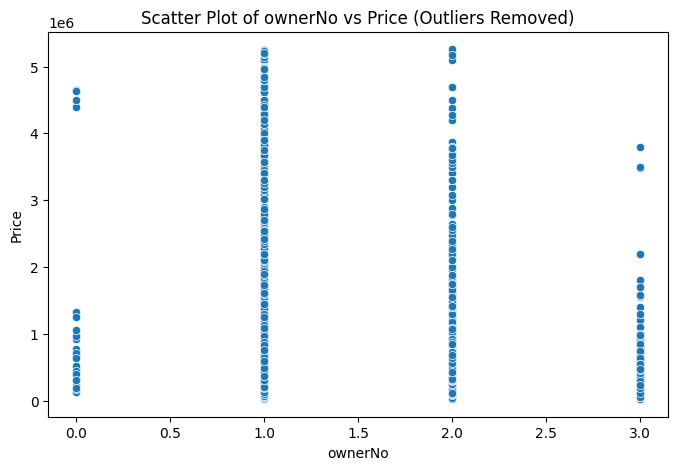

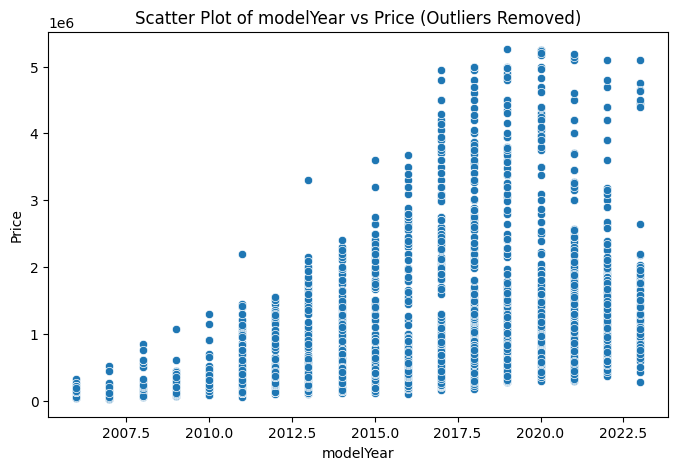

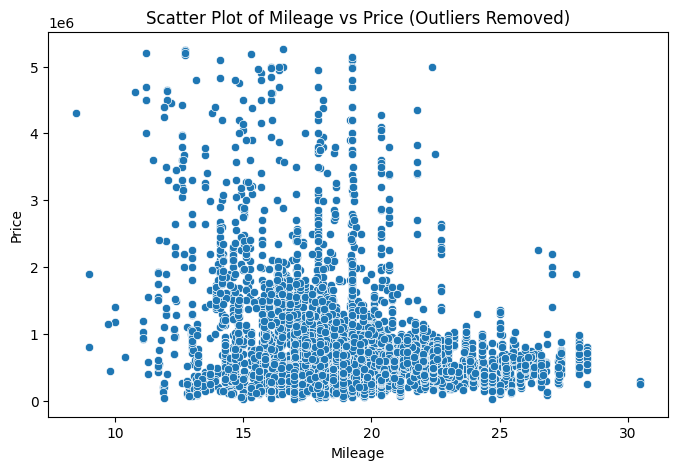

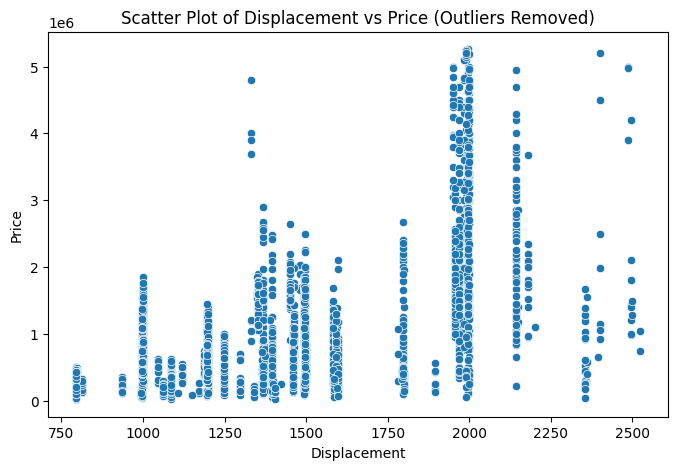

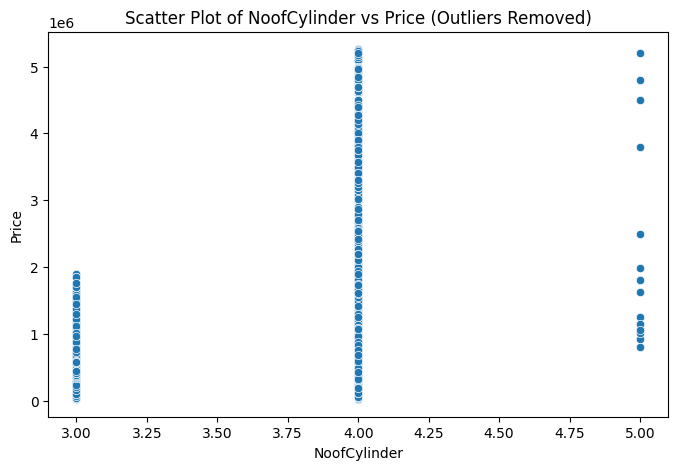

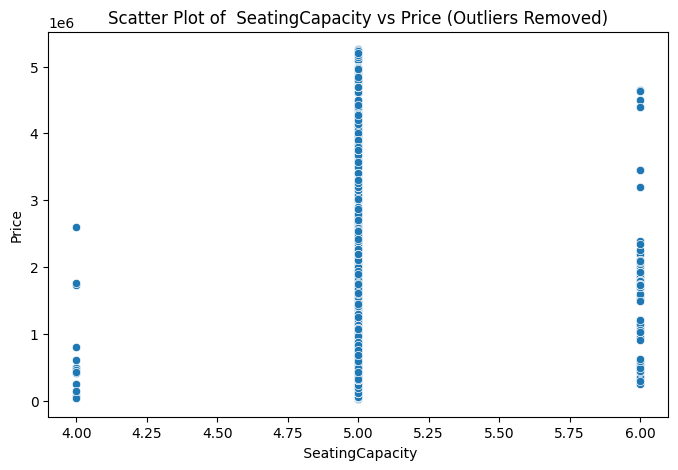

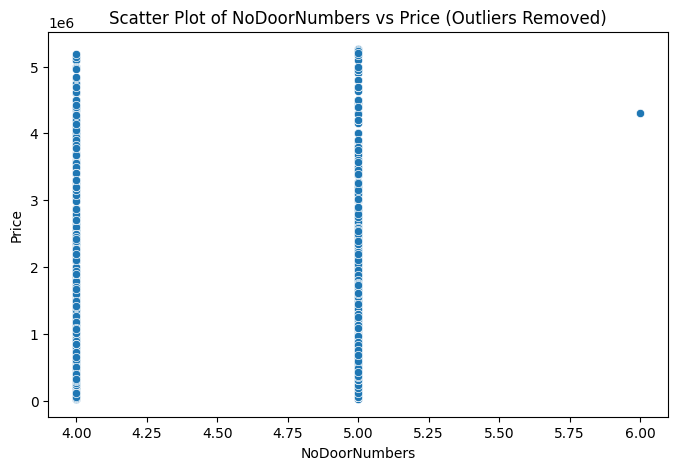

In [19]:
from scipy import stats
import pandas as pd

# Function to remove outliers based on Z-score for all numerical columns
def remove_outliers(df, columns, z_thresh=3):
    df_clean = df.copy()
    for column in columns:
        # Calculate Z-scores
        z_scores = stats.zscore(df_clean[column])
        # Filter out rows with Z-score above the threshold
        df_clean = df_clean[(abs(z_scores) < z_thresh)]
    return df_clean

# Apply the function to remove outliers
numeric_columns = numeric_df.columns
df_no_outliers = remove_outliers(df, numeric_columns)

# Save the resulting DataFrame to a CSV file
df_no_outliers.to_csv('cleaned_data_without_outliers.csv', index=False)

# Scatter plot for each numerical feature against 'price' without outliers
for column in numeric_columns:
    if column != 'price':
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=df_no_outliers, x=column, y='price')
        plt.title(f'Scatter Plot of {column} vs Price (Outliers Removed)')
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.show()


# MODELS

In [20]:
!pip install xgboost



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
# Load the dataset
df_cars = pd.read_csv('cleaned_data_without_outliers.csv')


In [23]:
df1=df_cars.to_csv("C:/Users/DELL/Downloads/cleaned_data_without_outliers.csv")

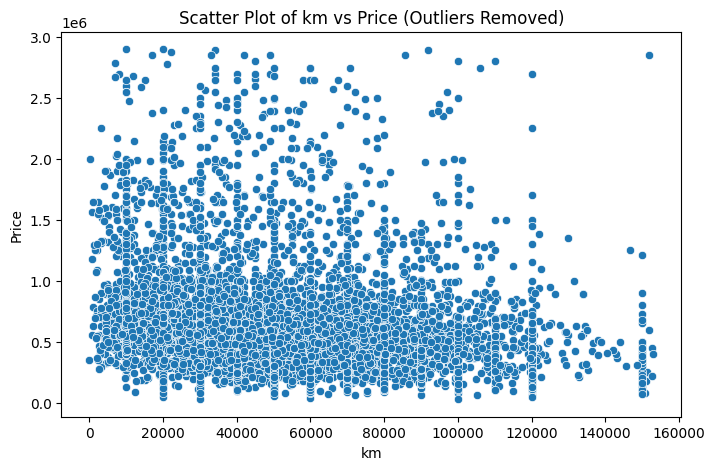

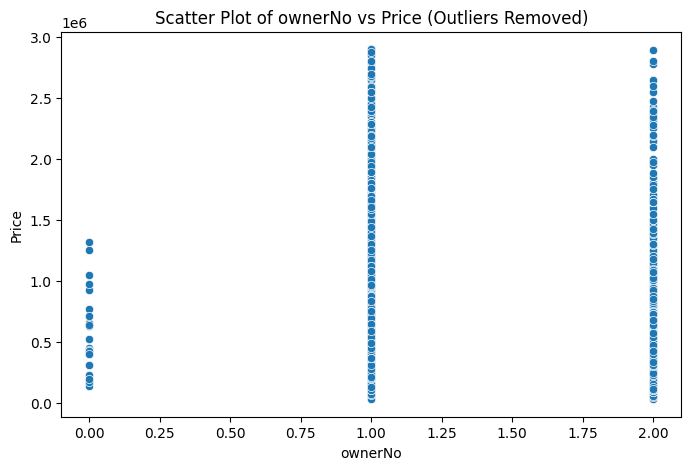

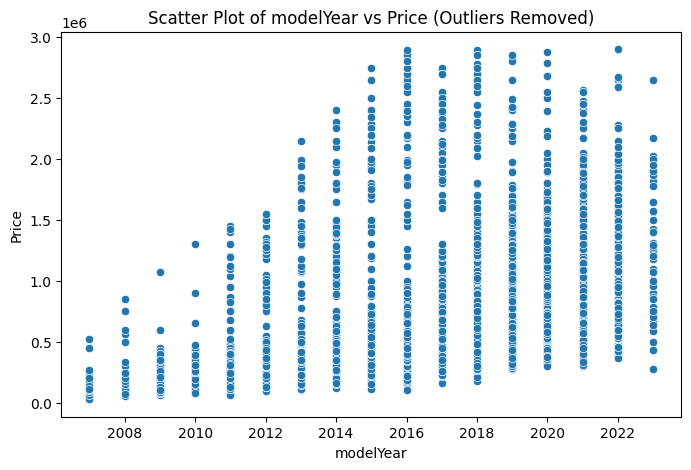

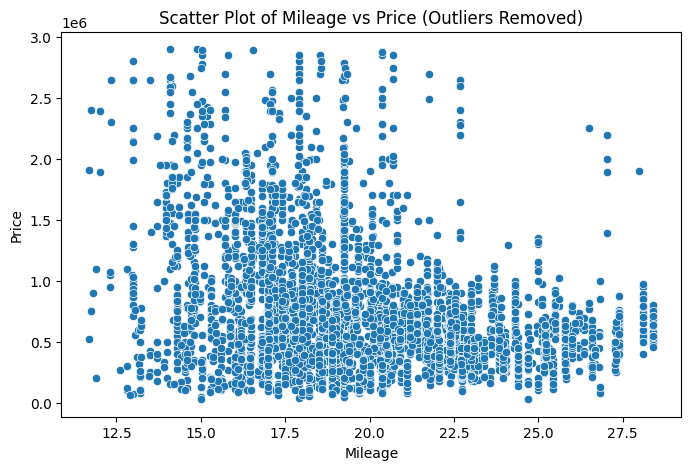

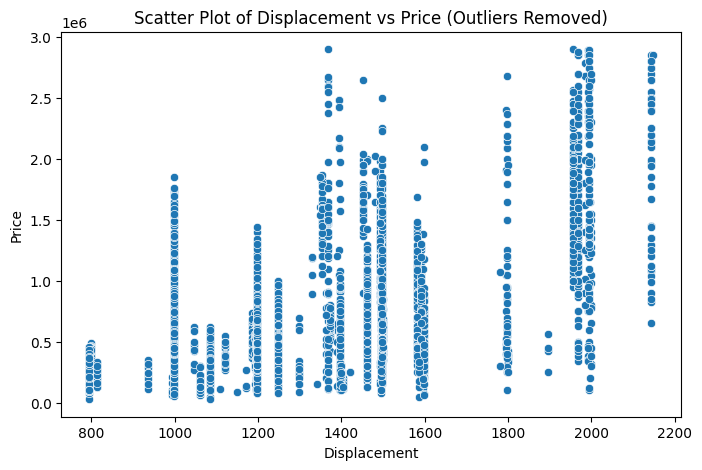

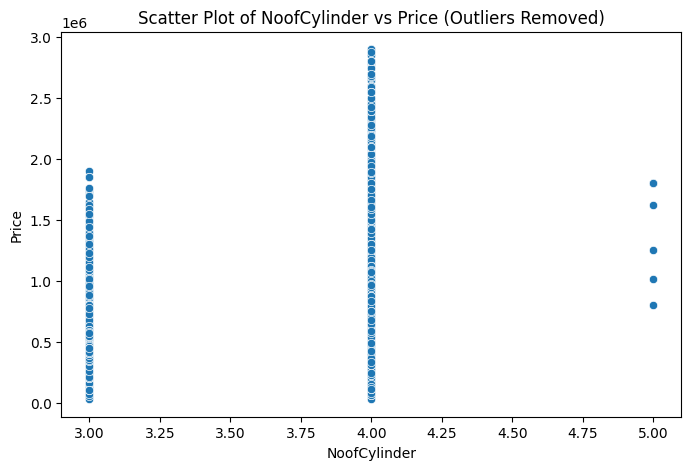

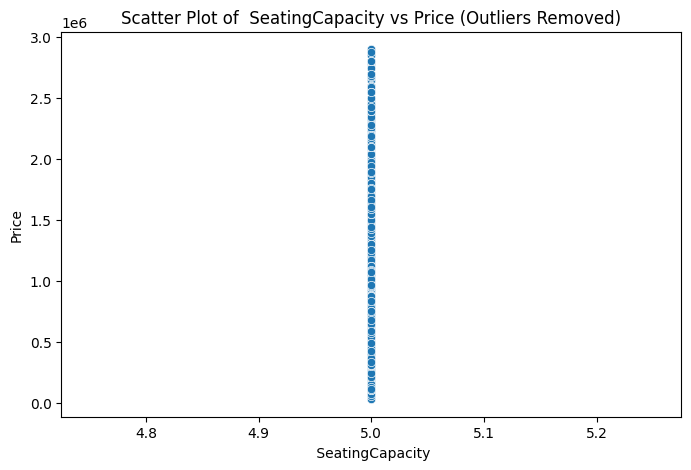

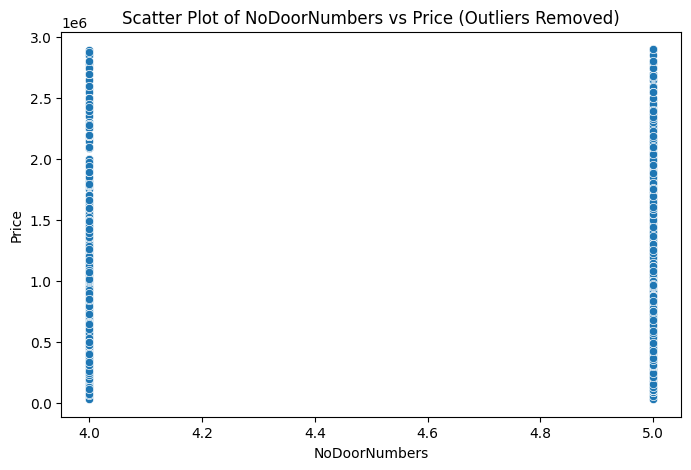

Training data shape: (5105, 2765)
Testing data shape: (1277, 2765)
                            Train MSE     Train MAE  Train R2  Train MAPE  \
Random Forest            2.487636e+09  28741.338459  0.988118    4.892756   
XGBoost Regressor        3.742605e+09  45136.634408  0.982124    8.379175   
Decision Tree Regressor  2.665371e+07    172.837088  0.999873    0.023276   
Linear Regression        4.587195e+09  38500.102625  0.978090    7.200376   

                             Test MSE       Test MAE   Test R2  Test MAPE  
Random Forest            1.588033e+10   72674.415801  0.921400  12.201146  
XGBoost Regressor        1.406822e+10   69895.969876  0.930369  11.722290  
Decision Tree Regressor  2.675856e+10   95589.489428  0.867558  15.489270  
Linear Regression        3.954163e+10  104201.106232  0.804288  20.956802  


In [24]:
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_cars = pd.read_csv('cleaned_data_without_outliers.csv')

# Function to remove outliers based on Z-score for all numerical columns
def remove_outliers(df, columns, z_thresh=3):
    df_clean = df.copy()
    for column in columns:
        # Calculate Z-scores
        z_scores = stats.zscore(df_clean[column])
        # Filter out rows with Z-score above the threshold
        df_clean = df_clean[(abs(z_scores) < z_thresh)]
    return df_clean

# Identify categorical and numerical columns
cat_features = df_cars.select_dtypes(include=['object']).columns
num_features = df_cars.select_dtypes(include=['number']).columns

# Remove outliers from the numerical columns
df_no_outliers = remove_outliers(df_cars, num_features)

# Scatter plot for each numerical feature against 'price' without outliers
for column in num_features:
    if column != 'price':
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=df_no_outliers, x=column, y='price')
        plt.title(f'Scatter Plot of {column} vs Price (Outliers Removed)')
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.show()

# Separate features (X) and target (y) without outliers
X = df_no_outliers.drop('price', axis=1)
y = df_no_outliers['price']

# Encode categorical features
X_encoded = pd.get_dummies(X, columns=cat_features, drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, shuffle=True)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Define models
regressors = {
    'Random Forest': RandomForestRegressor(),
    'XGBoost Regressor': XGBRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Linear Regression': LinearRegression()
}

# Store model performance results
performance_results = {}

# Loop through each model
for model_name, model in regressors.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    # Compute performance metrics for training and testing sets
    metrics = {
        'Train MSE': mean_squared_error(y_train, train_preds),
        'Train MAE': mean_absolute_error(y_train, train_preds),
        'Train R2': r2_score(y_train, train_preds),
        'Train MAPE': mean_absolute_percentage_error(y_train, train_preds) * 100,
        'Test MSE': mean_squared_error(y_test, test_preds),
        'Test MAE': mean_absolute_error(y_test, test_preds),
        'Test R2': r2_score(y_test, test_preds),
        'Test MAPE': mean_absolute_percentage_error(y_test, test_preds) * 100
    }
    
    performance_results[model_name] = metrics

# Convert results to DataFrame
results_df = pd.DataFrame(performance_results).T

# Display results
print(results_df)


In [ ]:
# Random Forest : Tuning using random search cv and testing again
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Hyperparameter tuning using RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_distributions,
    n_iter=100,
    scoring='neg_mean_absolute_percentage_error',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the RandomizedSearchCV
rf_random_search.fit(X_train, y_train)

# Get the best parameters
best_rf_params = rf_random_search.best_params_
print(f"Best Random Forest Parameters: {best_rf_params}")

# Initialize and train the Random Forest model with best parameters
best_rf_model = RandomForestRegressor(
    n_estimators=best_rf_params['n_estimators'],
    max_depth=best_rf_params['max_depth'],
    min_samples_split=best_rf_params['min_samples_split'],
    min_samples_leaf=best_rf_params['min_samples_leaf'],
    max_features=best_rf_params['max_features'],
    bootstrap=best_rf_params['bootstrap'],
    random_state=42
)

# Fit the model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on training data
y_train_pred = best_rf_model.predict(X_train)

# Calculate metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred) * 100

# Print metrics for the training set
print(f"Training Metrics:")
print(f"MSE: {train_mse}")
print(f"MAE: {train_mae}")
print(f"R^2: {train_r2}")
print(f"MAPE: {train_mape}%")

# Make predictions on test data
y_test_pred = best_rf_model.predict(X_test)

# Calculate metrics for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred) * 100

# Print metrics for the test set
print(f"\nTest Metrics:")
print(f"MSE: {test_mse}")
print(f"MAE: {test_mae}")
print(f"R^2: {test_r2}")
print(f"MAPE: {test_mape}%")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [21]:
#Regularization techniques Lasso, Ridge
from sklearn.linear_model import LinearRegression, Ridge, Lasso

models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
}
# Store the results
results = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100
    
    # Store the results
    results[model_name] = {
        'MSE_train': mse_train,
        'MAE_train': mae_train,
        'R2_train': r2_train,
        'MAPE_train': mape_train,
        'MSE_test': mse_test,
        'MAE_test':mae_test,
        'R2_test': r2_test,
        'MAPE_test': mape_test
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                     MSE_train     MAE_train  R2_train  MAPE_train  \
Ridge Regression  6.629821e+09  52688.578351  0.968334   10.079275   
Lasso Regression  4.671281e+09  39772.101027  0.977689    7.473311   

                      MSE_test      MAE_test   R2_test  MAPE_test  
Ridge Regression  2.156590e+10  85920.517100  0.893259  16.157639  
Lasso Regression  2.524533e+10  88394.914199  0.875048  15.703598  


In [22]:
import joblib

# Save the Random Forest model
joblib.dump(best_rf_model, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")


Model saved as 'random_forest_model.pkl'


In [23]:
# Save column names for encoding
encoded_columns = list(X_encoded.columns)
joblib.dump(encoded_columns, 'encoded_columns.pkl')

['encoded_columns.pkl']